### Data reading, pre-processing, data exploration and visualisations of processed twitter data (from task1)

In [59]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
import string
import os

In [84]:
# read data into a dataframe
tweets_df = pd.read_csv('../data/processed_tweet_data.csv')

In [85]:
tweets_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612,ketuesriche,551,351,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92,Grid1949,66,92,NaN,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",NaN
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899,RIPNY08,2666,2704,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",NaN
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20,pash22,28250,30819,NaN,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom


### Data Exploration

In [86]:
# size of data
tweets_df.shape

(6532, 15)

In [87]:
# get information about the data
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      6532 non-null   int64  
 7   retweet_count       6532 non-null   int64  
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  1518 non-null   object 
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               4088 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 765.6+

In [88]:
# descriptive statistics of data
tweets_df.describe()

,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,6532.000000,6532.000000,6532.000000,6532.000000,6.532000e+03,6532.000000
mean,0.050195,0.412159,242.896050,126.928353,1.649915e+04,1707.652021
std,0.311941,0.316800,617.588401,258.437016,2.597877e+05,5148.761957
min,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.125000,0.000000,0.000000,8.900000e+01,162.000000
50%,0.028125,0.400000,28.000000,14.000000,4.545000e+02,560.500000
75%,0.207273,0.633333,309.000000,131.250000,1.769000e+03,1765.000000
max,1.000000,1.000000,20527.000000,6847.000000,1.366658e+07,237298.000000


In [89]:
# check for missing values
print("The number of missing value(s): {}".format(tweets_df.isnull().sum().sum()))

The number of missing value(s): 7458


In [90]:
# define a function data that takes in a dataframe
def missing(data): 
    '''a function to check for missing values count and percentage missing'''
    #data = data.isnull().sum()
    count_missing = data.isnull().sum() # calculate total sum of missing data
    count_missing_percentage=round((data.isnull().sum()*100/len(data))) # multiply sum of missing data by 100 and divide by length of the whole data to calcualte the missing percentage of a column and round up 
    missing_column_name=data.columns 
    missing_df=pd.DataFrame(zip(count_missing,count_missing_percentage,missing_column_name),
                           columns=['Missing Count', '%Missing', 'ColumnName']) # create a dataframe containing column names, missing count and percent missing
    missing_df = missing_df.set_index('ColumnName') # set missing columns as index
    return missing_df

In [67]:
# use fuction on dataframe
missing(tweets_df)

,Missing Count,%Missing
ColumnName,,
Unnamed: 0,1,0.0
created_at,0,0.0
source,0,0.0
original_text,0,0.0
clean_text,4,0.0
sentiment,0,0.0
polarity,0,0.0
subjectivity,0,0.0
lang,0,0.0


In [91]:
# columns with missing values
print("Columns having missing value(s):{}".format(tweets_df.columns[tweets_df.isnull().any()]))

Columns having missing value(s):Index(['possibly_sensitive', 'place'], dtype='object')


In [92]:
# datatype of columns
tweets_df.dtypes

created_at             object
source                 object
original_text          object
polarity              float64
subjectivity          float64
lang                   object
favorite_count          int64
retweet_count           int64
original_author        object
followers_count         int64
friends_count           int64
possibly_sensitive     object
hashtags               object
user_mentions          object
place                  object
dtype: object

In [104]:
# import cleaned data from clean_tweets_dataframe.py
df = pd.read_csv("../data/cleaned_tweet_data.csv")

In [105]:
df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612,ketuesriche,551,351,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92,Grid1949,66,92,NaN,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland"
2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",NaN
3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899,RIPNY08,2666,2704,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",NaN
4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20,pash22,28250,30819,NaN,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom


#### dropped unwanted columns, duplicates, converted created_at column to datetime, removed non English tweets.

In [106]:
# clean original_text
df['clean_text'] = df['original_text'].str.replace("[^a-zA-Z#@\s]", "") # remove non-alphabetic characters
df['clean_text'] = df['clean_text'].str.replace("\n", "\s")
df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612,ketuesriche,551,351,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,Africa is in the midst of a fullblown third wa...
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92,Grid1949,66,92,NaN,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",Dr Moeti is head of WHO in Africa and one of t...
2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",NaN,Thank you @researchnote for creating this amaz...
3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899,RIPNY08,2666,2704,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",NaN,Former Pfizer VP and Virologist Dr Michael Yea...
4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20,pash22,28250,30819,NaN,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,I think its important that we dont sell COVAX ...


### Some Visuals

<AxesSubplot:title={'center':'Top 5 tweet locations'}>

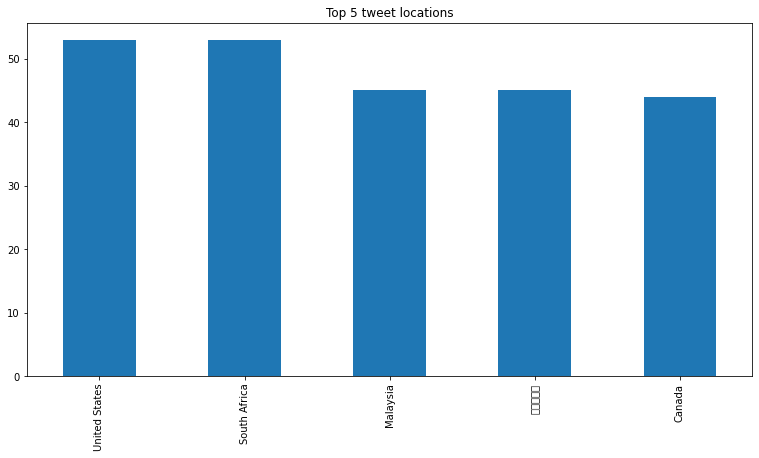

In [115]:
# top 5 tweet locations
plt.figure(figsize=(13, 6.5))
locations = df.place.value_counts().head(5)
locations.plot(kind = 'bar', title= 'Top 5 tweet locations')

<AxesSubplot:title={'center':'Top 10 twitter_handles'}>

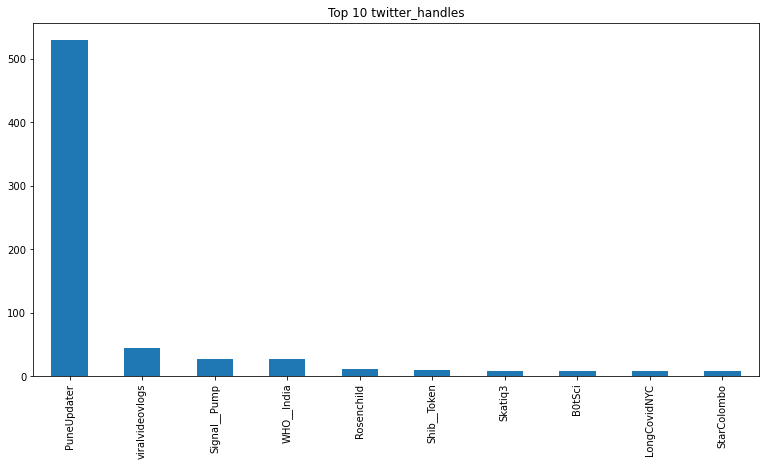

In [119]:
# top 10 authors
plt.figure(figsize=(13, 6.5))
df['original_author'].value_counts().head(10).plot(kind='bar', title = 'Top 10 twitter_handles')

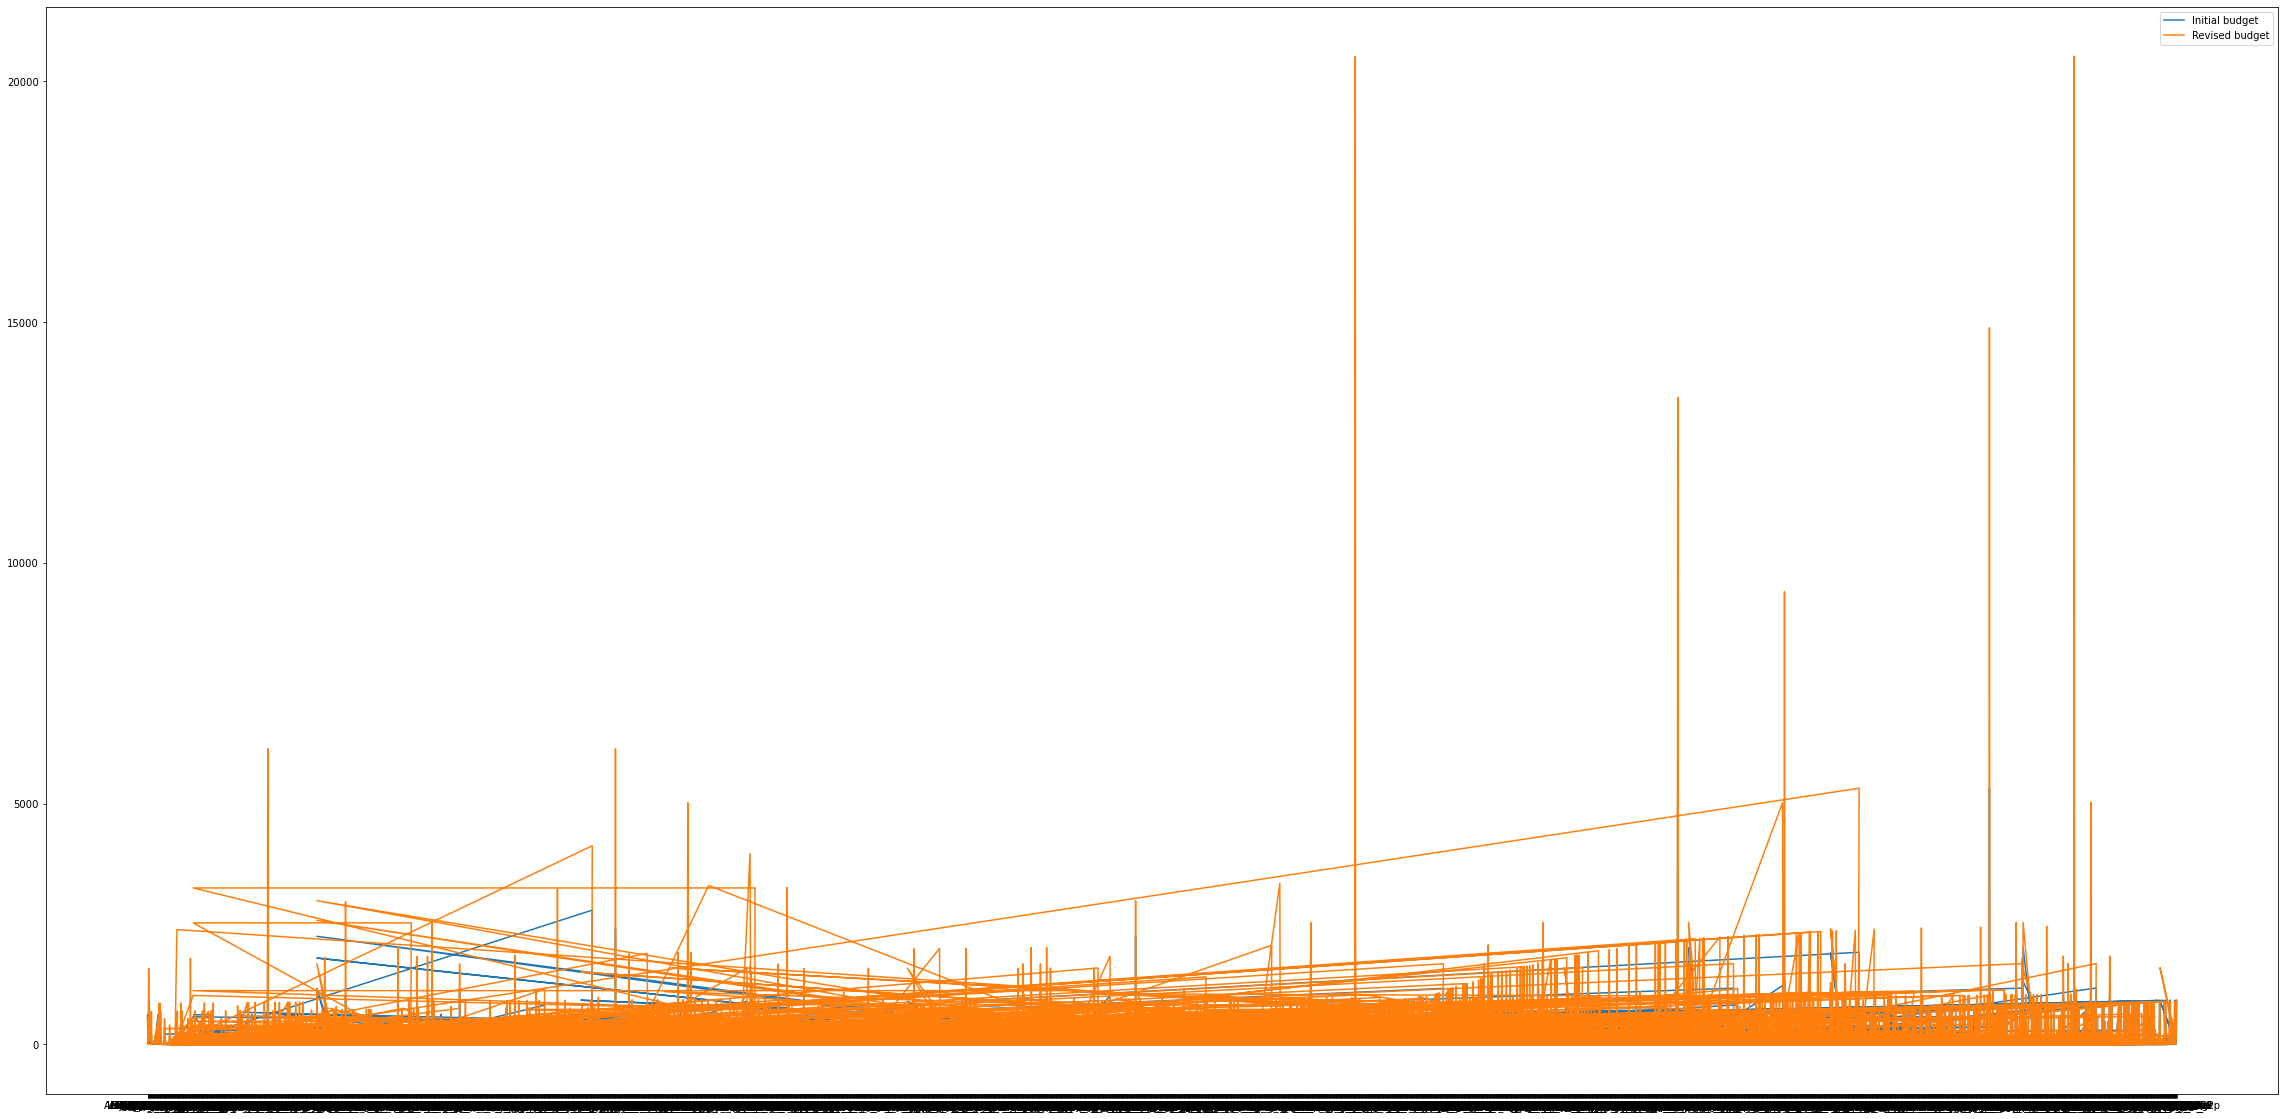

In [124]:
plt.figure(figsize=(40, 20))
x = df['original_author']
y1 = df['retweet_count']
y2 = df['favorite_count']

plt.plot(x, y1, x, y2)
plt.legend(['Initial budget', 'Revised budget'])

In [125]:
# create text_category function
def text_category(p):
    ''' A function  that takes a value p and returns, depending on the value of p, 
    a string 'positive', 'negative' or 'neutral' '''
    
    if p > 0:
        return 'positive'
    elif p < 0:
        return 'negative'
    else:
        return 'neutral'

In [126]:
# apply above function on polarity column
df['score'] = df['polarity'].apply(text_category)

<AxesSubplot:ylabel='score'>

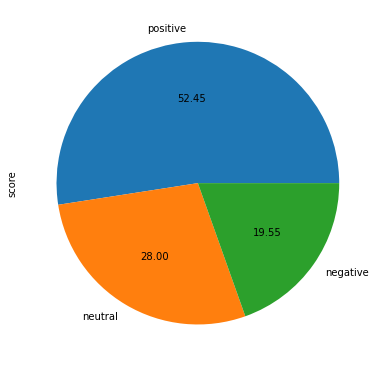

In [128]:
# plot sentiment
plt.figure(figsize=(13, 6.5))
df['score'].value_counts().plot(kind='pie', autopct='%.2f')

In [129]:
# function to find hashtags from tweets
def find_hashtags(df):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', df)

In [130]:
# update hashtag columon with hashtages extracted from Orignal_text columon
tweets_df['hashtags'] = tweets_df.original_text.apply(find_hashtags)
print(tweets_df['hashtags'])

0                        []
1                        []
2           [#red4research]
3                [#Covid19]
4                        []
               ...         
6527                     []
6528             [#Covid19]
6529                     []
6530    [#COVID19, #Africa]
6531                     []
Name: hashtags, Length: 6532, dtype: object


In [131]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
                       tweets_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [132]:
hashtags_list_df

,hashtags
2,[#red4research]
3,[#Covid19]
5,"[#WeCanDoThis, #COVID19]"
9,"[#Covid19, #DeltaVariant]"
10,"[#WeCanDoThis, #COVID19]"
...,...
6518,[#COVID19]
6522,"[#DrLiMengYan, #CCPVirus, #Covid19, #Unrestric..."
6524,[#VaccinationDrive]
6528,[#Covid19]


In [134]:
 #create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

flattened_hashtags_df

,hashtag
0,#red4research
1,#Covid19
2,#WeCanDoThis
3,#COVID19
4,#Covid19
...,...
7047,#OriginOfCOVID19
7048,#VaccinationDrive
7049,#Covid19
7050,#COVID19


In [135]:
#add flatten_hashtags to df
df['flattened_hashtags']= flattened_hashtags_df
df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text,score,flattened_hashtags
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612,ketuesriche,551,351,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,Africa is in the midst of a fullblown third wa...,positive,#red4research
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92,Grid1949,66,92,NaN,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",Dr Moeti is head of WHO in Africa and one of t...,positive,#Covid19
2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",NaN,Thank you @researchnote for creating this amaz...,positive,#WeCanDoThis
3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899,RIPNY08,2666,2704,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",NaN,Former Pfizer VP and Virologist Dr Michael Yea...,positive,#COVID19
4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20,pash22,28250,30819,NaN,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,I think its important that we dont sell COVAX ...,positive,#Covid19


<AxesSubplot:>

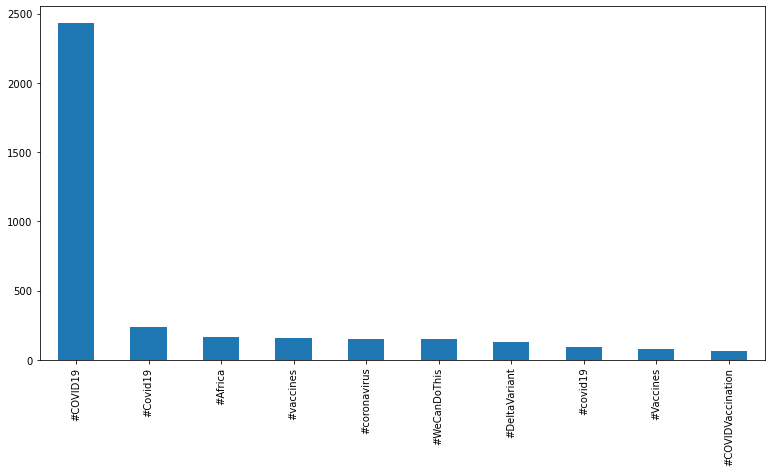

In [137]:
# top 10 hashtags
plt.figure(figsize=(13, 6.5))
df['flattened_hashtags'].value_counts()[:10].plot(kind='bar')

### Data Preparation

In [139]:
# selecting neccessary columns for topic modelling
tweets_data = df[['clean_text', 'polarity']]
tweets_data.head()

,clean_text,polarity
0,Africa is in the midst of a fullblown third wa...,0.166667
1,Dr Moeti is head of WHO in Africa and one of t...,0.133333
2,Thank you @researchnote for creating this amaz...,0.316667
3,Former Pfizer VP and Virologist Dr Michael Yea...,0.086111
4,I think its important that we dont sell COVAX ...,0.280000


In [140]:
# text preprocessing
tweets_data['clean_text']=tweets_data['clean_text'].astype(str) # convert to string
tweets_data['clean_text'] = tweets_data['clean_text'].apply(lambda x: x.lower()) # convert to lowercase
tweets_data['clean_text']= tweets_data['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation))) # remove punctuation

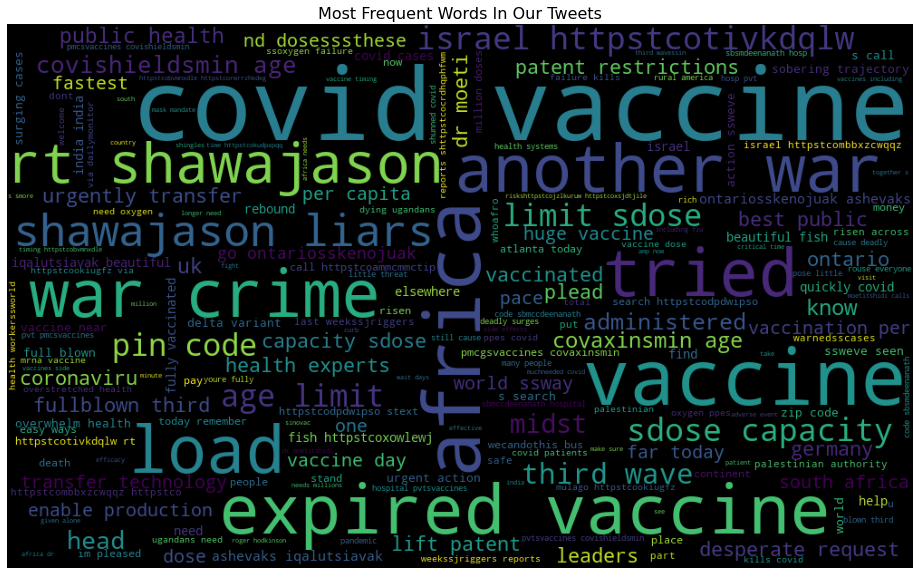

In [143]:
# word cloud visualization of most common words
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(tweets_data.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [146]:
# save data for modelling
tweets_data.to_csv('../data/model_data.csv', index=False)
print('Data Successfully Saved!!')

Data Successfully Saved!!
